In [1]:
import os 
import pandas as pd 
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")

from keras import backend as K
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from IPython.display import Image

In [2]:
driver_image_file = pd.read_csv(r"C:\Users\ajayp\OneDrive\Desktop\Deep Learning\DL Projects\4.Distracted Driver MultiAction Classification\state-farm-distracted-driver-detection\driver_imgs_list.csv")

In [3]:
driver_image_file.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [4]:
train_image = []
image_label = []


for i in range(10):
    print('now we are in the folder C',i)
    path = r"C:\Users\ajayp\OneDrive\Desktop\Deep Learning\DL Projects\4.Distracted Driver MultiAction Classification\state-farm-distracted-driver-detection\imgs\train\C"
    imgs = os.listdir (path +str(i))
    for j in range(len(imgs)):
  
        img_name = path +str(i)+"/"+imgs[j]
        img = cv2.imread(img_name)
    
        img = img[50:,120:-50]
        img = cv2.resize(img,(224,224))
        label = i
        driver = driver_image_file[driver_image_file['img'] == imgs[j]]['subject'].values[0]
        train_image.append([img,label,driver])
        image_label.append(i)

now we are in the folder C 0
now we are in the folder C 1
now we are in the folder C 2
now we are in the folder C 3
now we are in the folder C 4
now we are in the folder C 5
now we are in the folder C 6
now we are in the folder C 7
now we are in the folder C 8
now we are in the folder C 9


In [5]:
## Randomly shuffling the images

import random
random.shuffle(train_image)

In [6]:
driv_selected = ['p050', 'p015', 'p022', 'p056']

In [7]:
## Splitting the train and test

X_train= []
y_train = []
X_test = []
y_test = []
D_train = []
D_test = []

for features,labels,drivers in train_image:
    if drivers in driv_selected:
        X_test.append(features)
        y_test.append(labels)
        D_test.append(drivers)
    
    else:
        X_train.append(features)
        y_train.append(labels)
        D_train.append(drivers)
    
print (len(X_train),len(X_test))
print (len(y_train),len(y_test))

18732 3692
18732 3692


In [8]:
## Converting images to nparray. Encoding the Y
from keras.utils import to_categorical

X_train = np.array(X_train).reshape(-1,224,224,3)
X_test = np.array(X_test).reshape(-1,224,224,3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print (X_train.shape)

(18732, 224, 224, 3)


In [9]:
#imports the mobilenet model and discards the last 1000 neuron layer.
base_model=MobileNet(weights='imagenet',include_top=False) 
base_model.summary()



Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None

                                                                 
 conv_pw_7 (Conv2D)          (None, None, None, 512)   262144    
                                                                 
 conv_pw_7_bn (BatchNormali  (None, None, None, 512)   2048      
 zation)                                                         
                                                                 
 conv_pw_7_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_dw_8 (DepthwiseConv2D  (None, None, None, 512)   4608      
 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, None, None, 512)   2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, None, None, 512)   0         
          

In [10]:

#CLASSES = 10
#base_model_output = base_model.output
#global_avg_layer = GlobalAveragePooling2D(name = 'avg_pool')(base_model_output)
#dense_layer = Dense(128, activation = 'relu')(global_avg_layer)
#predictions = Dense(CLASSES, activation = 'softmax')(dense_layer)
#model = Model(inputs = base_model.input, outputs = predictions)

In [11]:
from tensorflow.keras.models import Model
x=base_model.output
x=GlobalAveragePooling2D()(x)
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation
model = Model(inputs=base_model.input, outputs=preds)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None, 32)    128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, None, None, 512)   2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_pw_8 (Conv2D)          (None, None, None, 512)   262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, None, None, 512)   2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, None, None, 512)   4608      
 )        

In [13]:
#for layer in base_model.layers:
    #layer.trainable = False

In [14]:
from keras import optimizers  

sgd = optimizers.SGD(learning_rate = 0.005) 
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpointer = ModelCheckpoint('mobilenet_sgd_nolayer.hdf5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

datagen = ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )

data_generator = datagen.flow(X_train, y_train, batch_size = 64)

mobilenet_model = model.fit_generator(data_generator,steps_per_epoch = len(X_train) / 64, callbacks=[checkpointer, earlystopper],
                                                            epochs = 25, verbose = 1, validation_data = (X_test, y_test))


Epoch 1/25


293/292 [==============================] - ETA: -1s - loss: 1.8383 - accuracy: 0.3771
Epoch 1: val_loss improved from inf to 1.13698, saving model to mobilenet_sgd_nolayer.hdf5
292/292 [==============================] - 1724s 6s/step - loss: 1.8383 - accuracy: 0.3771 - val_loss: 1.1370 - val_accuracy: 0.6314
Epoch 2/25
293/292 [==============================] - ETA: -1s - loss: 1.0495 - accuracy: 0.6642
Epoch 2: val_loss improved from 1.13698 to 0.64766, saving model to mobilenet_sgd_nolayer.hdf5
292/292 [==============================] - 1558s 5s/step - loss: 1.0495 - accuracy: 0.6642 - val_loss: 0.6477 - val_accuracy: 0.7676
Epoch 3/25
293/292 [==============================] - ETA: -1s - loss: 0.7758 - accuracy: 0.7477
Epoch 3: val_loss improved from 0.64766 to 0.49323, saving model to mobilenet_sgd_nolayer.hdf5
292/292 [==============================] - 1667s 6s/step - loss: 0.7758 - accuracy: 0.7477 - val_loss: 0.4932 - val_accuracy: 0.8313
Epoch 4/25
293/292 [=======

In [17]:
import matplotlib.pyplot as plt

Image number: 0


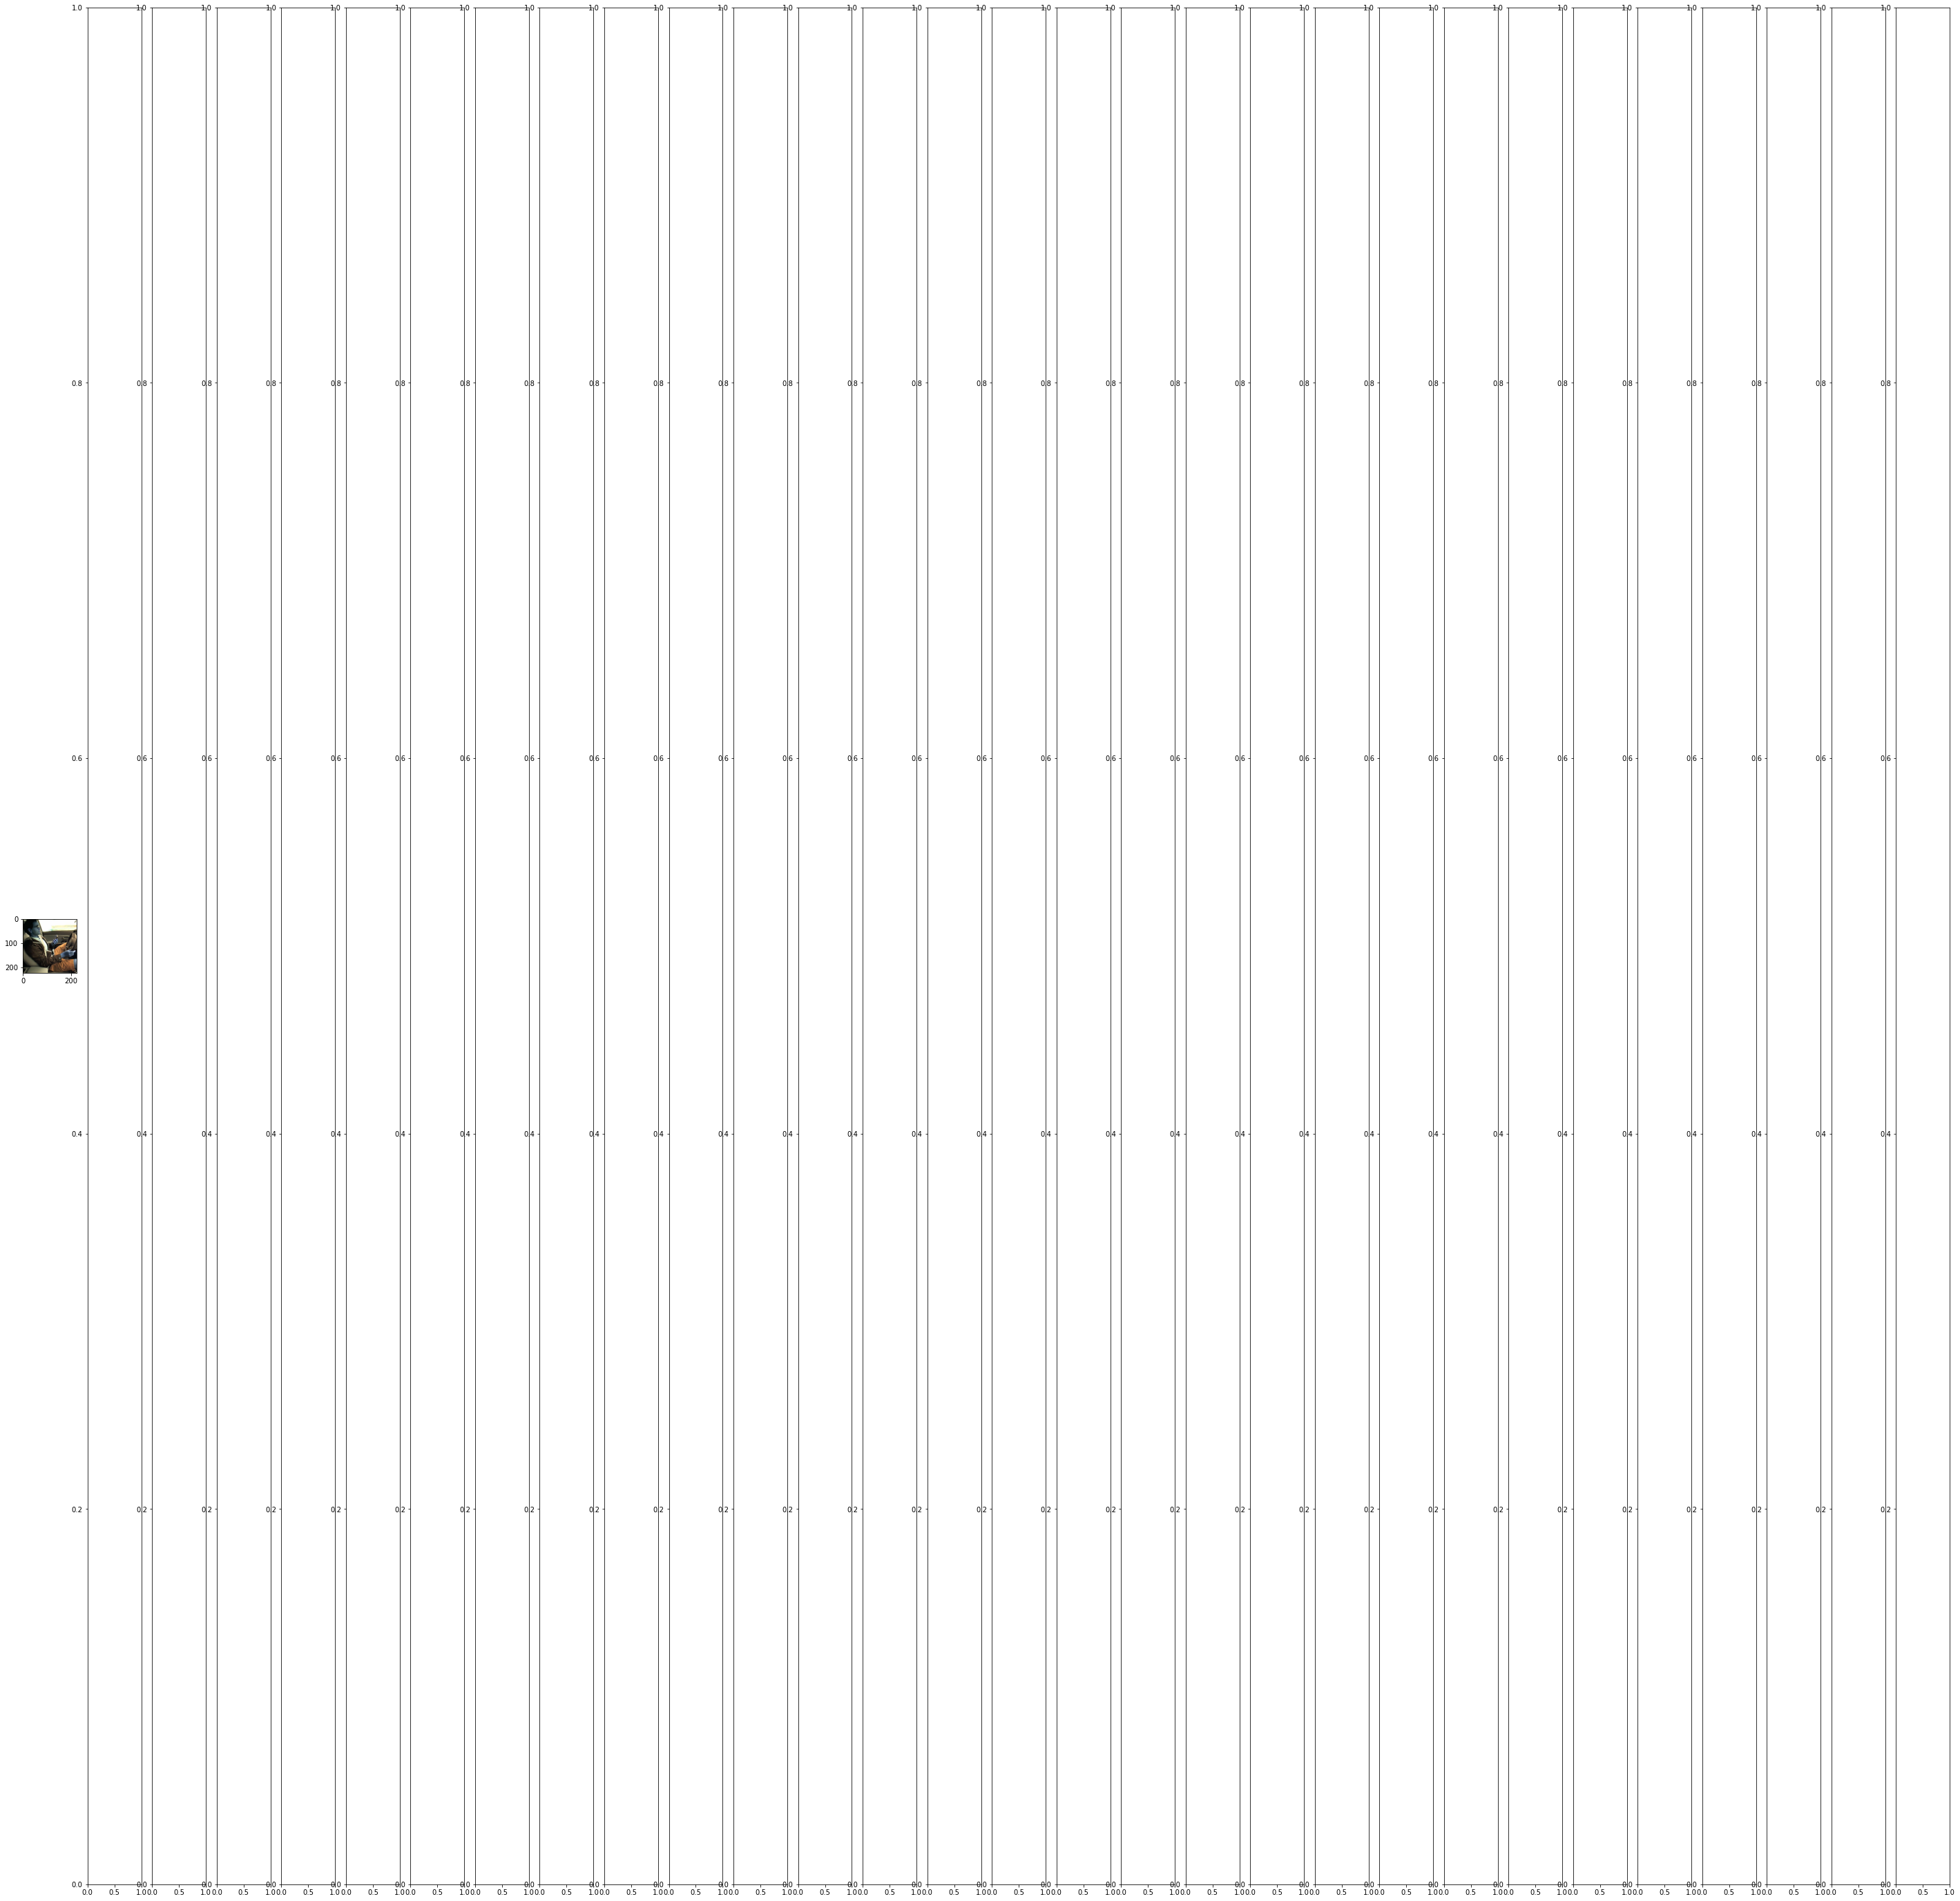

Image number: 1
Image number: 2
Image number: 3
Image number: 4
Image number: 5
Image number: 6
Image number: 7
Image number: 8
Image number: 9
Image number: 10
Image number: 11
Image number: 12
Image number: 13
Image number: 14
Image number: 15
Image number: 16
Image number: 17
Image number: 18
Image number: 19
Image number: 20
Image number: 21
Image number: 22
Image number: 23
Image number: 24
Image number: 25
Image number: 26
Image number: 27
Image number: 28
Image number: 29


In [45]:
test_image = []
i = 0
fig, ax = plt.subplots(1, 30, figsize = (50,50 ))
test_path = r"C:\Users\ajayp\OneDrive\Desktop\Deep Learning\DL Projects\4.Distracted Driver MultiAction Classification\state-farm-distracted-driver-detection\imgs\test"
files = os.listdir(test_path)
nums = np.random.randint(low=1, high=len(files), size=30)
for i in range(30):
    print ('Image number:',i)
    img = cv2.imread(os.path.join(test_path, files[nums[i]]))
    #img = color.rgb2gray(img)
    img = img[50:,120:-50]
    img = cv2.resize(img,(224,224))
    test_image.append(img)
    ax[i].imshow(img,cmap = 'gray')
    plt.show ()

In [46]:
test = []

for img in test_image:
    test.append(img)
    
model.load_weights('mobilenet_sgd_nolayers.hdf5')


test = np.array(test).reshape(-1,224,224,3)
prediction = model.predict(test)

1/1 [==============================] - 1s 564ms/step


In [47]:
prediction[0]

array([0.18673132, 0.06348473, 0.00294832, 0.51331925, 0.1035766 ,
       0.06690737, 0.00843136, 0.02194696, 0.01402798, 0.01862605],
      dtype=float32)

In [48]:
tags = { "C0": "safe driving",
"C1": "texting - right",
"C2": "talking on the phone - right",
"C3": "texting - left",
"C4": "talking on the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }

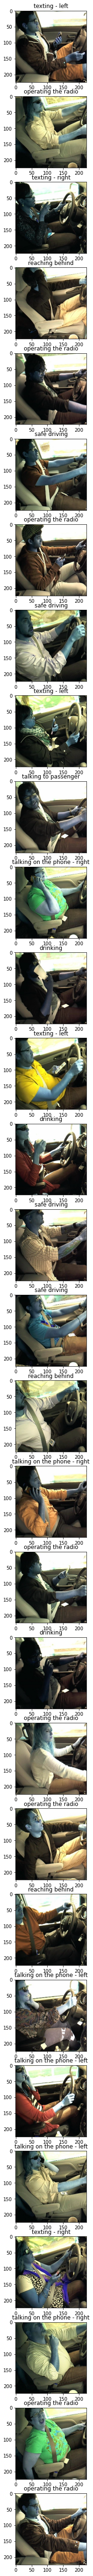

In [49]:
# labels is the image array
i = 0
fig, ax = plt.subplots(30, 1, figsize = (100,100))

for i in range(30):
    ax[i].imshow(test[i].squeeze())
    predicted_class = 'C'+str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    ax[i].set_title(tags[predicted_class])
    plt.show